In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os
from matplotlib.ticker import FixedLocator, FixedFormatter


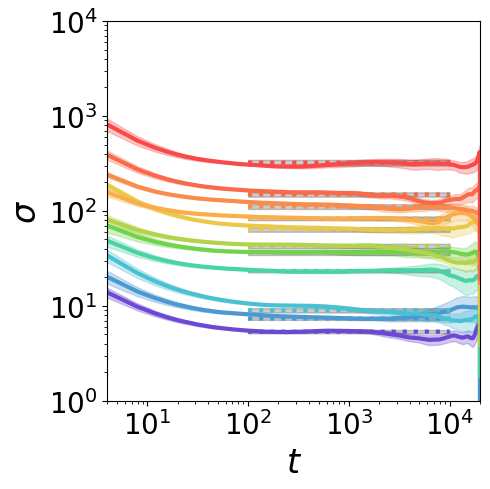

In [1]:

import os, glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

base_dir = "./" 
os.chdir(base_dir)

D_files = sorted(glob.glob("Sigma_MD_0.2_LJ_*.csv"))
fit_params = pd.read_csv("Sigma_fit_MD_0.2_LJ.csv")

r_values = fit_params["r_value"].tolist() if "r_value" in fit_params.columns else \
           [float(name.split("_")[-1].replace(".csv","")) for name in D_files]

colors_hex = [
    '#6b4ad3', '#4a99d3', '#4ac0d3', '#4ad3a3', '#70d34a',
    '#b3d34a', '#e9c84a', '#f9ae4a', '#f98c4a', '#f96a4a', '#f94a4a'
]
tmin_fit = 100.0
tmax_fit = 10000.0

fig, ax = plt.subplots(figsize=(5,5))


ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim(4, 2e4)
ax.set_ylim(1, 1e4)

# from matplotlib.ticker import NullFormatter
# ax.xaxis.set_minor_formatter(NullFormatter())
# ax.yaxis.set_minor_formatter(NullFormatter())

ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel(r'$t$', fontsize=24)
ax.set_ylabel(r'$\sigma$', fontsize=24)

# ax.set_yticks([1e-1, 2e-1])
# ax.set_yticklabels(['0.1', '0.2'], fontsize=20)

for i, (r_value, color) in enumerate(zip(r_values, colors_hex)):
    file = f"Sigma_MD_0.2_LJ_{r_value}.csv"
    data = pd.read_csv(file)

    x = np.array(data["t"])
    y = np.array(data["sigma_avg"])
    yerr = data["sigma_err"]

    mask = (x >= tmin_fit) & (x <= tmax_fit)
    time_fit = np.array(x[mask])

    params = fit_params.iloc[i]
    Dpp = params["sigma_fit"]
    Dpp_err = params["sigma_fit_err"]

    ax.plot(x, y, linestyle="-", color=color, linewidth=3)
    ax.fill_between(x, y - yerr, y + yerr, color=color, alpha=0.3)

    fitted_data = np.full_like(time_fit, Dpp)
    ax.plot(time_fit, fitted_data, color=color, linewidth=3, linestyle=":")
    ax.fill_between(time_fit, fitted_data - Dpp_err, fitted_data + Dpp_err, color="black", alpha=0.2)

plt.tight_layout()
plt.show()

